In [24]:
# Importing essential packages
import pandas as pd

In [25]:
# Load the dataset
df = pd.read_csv("dataset_and_description/PlayerStats.csv")

In [26]:
# Now display a few rows of the datasets
df.head()

,player,injury type,season,LEBRON diff,BPM diff,age,height,weight,previous injury,change,O-LEBRON diff,D-LEBRON diff,avg minutes,o-change,d-change
0,Ratliff,2,2010,-10.000,-10.00,37,82,225,1,1,-5.000,-5.000,16.5,4,4
1,Perkins,0,2010,-2.280,-1.65,25,82,270,0,2,-1.585,-0.680,26.9,1,2
2,Okur,1,2010,-2.040,-4.30,31,83,249,0,2,-0.585,-1.455,29.4,2,2
3,Andersen,0,2010,-1.575,0.65,32,82,245,0,3,-1.190,-0.390,22.3,2,3
4,Haslem,1,2010,-0.970,-0.35,30,80,235,0,3,-1.080,0.120,27.9,2,3


In [27]:
# create a new BMI columns 
df['BMI'] = 703 * df['weight'] / (df['height'] ** 2)

In [28]:
# Now display some few header rows again 
df.head()

,player,injury type,season,LEBRON diff,BPM diff,age,height,weight,previous injury,change,O-LEBRON diff,D-LEBRON diff,avg minutes,o-change,d-change,BMI
0,Ratliff,2,2010,-10.000,-10.00,37,82,225,1,1,-5.000,-5.000,16.5,4,4,23.523944
1,Perkins,0,2010,-2.280,-1.65,25,82,270,0,2,-1.585,-0.680,26.9,1,2,28.228733
2,Okur,1,2010,-2.040,-4.30,31,83,249,0,2,-0.585,-1.455,29.4,2,2,25.409639
3,Andersen,0,2010,-1.575,0.65,32,82,245,0,3,-1.190,-0.390,22.3,2,3,25.614961
4,Haslem,1,2010,-0.970,-0.35,30,80,235,0,3,-1.080,0.120,27.9,2,3,25.813281


# Note that this analysis will not focus on all of these factors, it will just focus on some interested factors

In [29]:
df = df[['player', 'injury type', 'season', 'age', 'height', 'weight', 'previous injury', 'change', 'avg minutes', 'BMI']]

In [30]:
# Display the dataframe again 
df.head()

,player,injury type,season,age,height,weight,previous injury,change,avg minutes,BMI
0,Ratliff,2,2010,37,82,225,1,1,16.5,23.523944
1,Perkins,0,2010,25,82,270,0,2,26.9,28.228733
2,Okur,1,2010,31,83,249,0,2,29.4,25.409639
3,Andersen,0,2010,32,82,245,0,3,22.3,25.614961
4,Haslem,1,2010,30,80,235,0,3,27.9,25.813281


## Now check for NaN values first 

In [31]:
df.isna().sum()

player             0
injury type        0
season             0
age                0
height             0
weight             0
previous injury    0
change             0
avg minutes        0
BMI                0
dtype: int64

- Okay all good not any NaN values here, no need to handle the datasets

## Now check the value of the features in the dataframe

In [34]:
unique = df.columns.tolist()
for col_name in unique:
    col = df[col_name]
    print("This is column: " + col_name)
    print(col.value_counts())
    print("")
    print("*" * 80)
    print("")

This is column: player
player
Rose          4
Andersen      2
Davis         2
Bledsoe       2
Varejao       2
             ..
Williamson    1
Miller        1
T. Bryant     1
Dinwiddie     1
Fultz         1
Name: count, Length: 99, dtype: int64

********************************************************************************

This is column: injury type
injury type
2    44
0    42
1    27
Name: count, dtype: int64

********************************************************************************

This is column: season
season
2012    16
2017    14
2013    13
2015    12
2020    10
2010     9
2011     8
2016     8
2014     7
2018     7
2019     6
2021     3
Name: count, dtype: int64

********************************************************************************

This is column: age
age
30    13
25    12
23    11
27    10
24     9
22     8
28     7
26     7
21     6
31     5
32     5
29     5
34     3
20     2
19     2
36     2
33     2
37     1
35     1
39     1
38     1
Name: count, dty

### Basic notes from the value counts of these features 
#### With Player 
- Derick Rose is the player with highest number of SERIOUS INJURIES 

## Now check basic correlations between features here - choosing Pearson correlation as the feature's values are numerical and seems to have linear relationship 

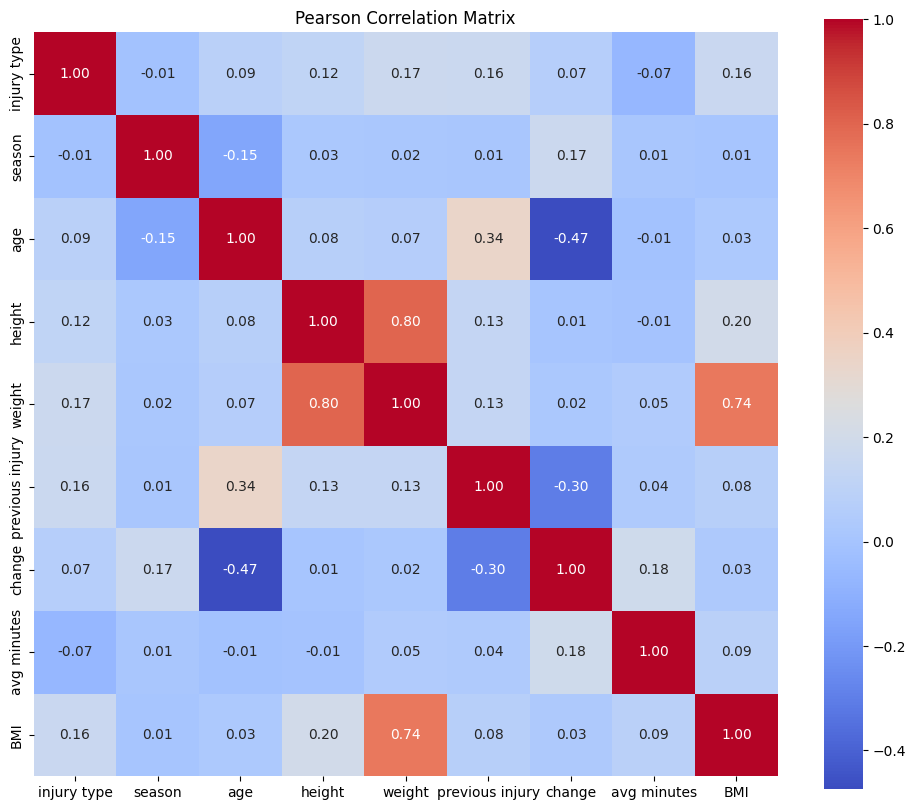

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate Pearson correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Pearson Correlation Matrix')
plt.show()